In [1]:
%%time 

from IPython.display import clear_output
clear_output()

from AMemoryTest import *

print( "Importing done.")


Hello...

Importing done.
Wall time: 1.5 s


use_gpu = 0, operation = 

numpy int32 (4 bytes)
Unable to allocate 20.3 GiB for an array with shape (73729, 73729) and data type int32
grid_count = 73_729, size = 21.7 Gb, run-time = 0.04 (sec.)

numpy float64 (8 bytes)
Unable to allocate 21.1 GiB for an array with shape (53249, 53249) and data type float64
grid_count = 53_249, size = 22.7 Gb, run-time = 0.01 (sec.)

numpy complex64 (8 bytes)
Unable to allocate 21.1 GiB for an array with shape (53249, 53249) and data type complex64
grid_count = 53_249, size = 22.7 Gb, run-time = 0.02 (sec.)

numpy complex128 (16 bytes)
Unable to allocate 20.3 GiB for an array with shape (36865, 36865) and data type complex128
grid_count = 36_865, size = 21.7 Gb, run-time = 0.00 (sec.)



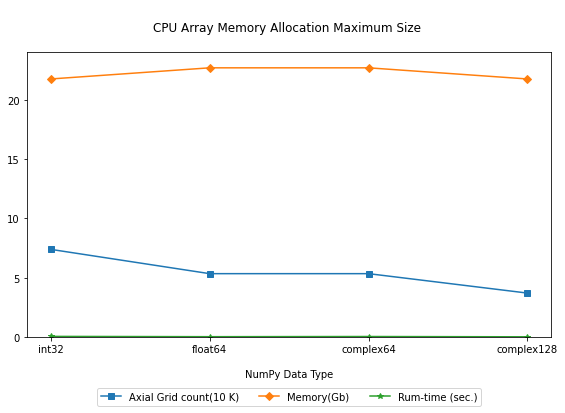

Done.


In [2]:
test_array_memory( use_gpu=0, operation="", debug=1, verbose=0 )

use_gpu = 0, operation = *

numpy int32 (4 bytes)
Unable to allocate 5.06 GiB for an array with shape (36865, 36865) and data type int32
grid_count = 36_865, size = 5.4 Gb, run-time = 7.55 (sec.)

numpy float64 (8 bytes)
Unable to allocate 4.88 GiB for an array with shape (25601, 25601) and data type float64
grid_count = 25_601, size = 5.2 Gb, run-time = 7.87 (sec.)

numpy complex64 (8 bytes)
Unable to allocate 4.88 GiB for an array with shape (25601, 25601) and data type complex64
grid_count = 25_601, size = 5.2 Gb, run-time = 7.45 (sec.)

numpy complex128 (16 bytes)
Unable to allocate 5.06 GiB for an array with shape (18433, 18433) and data type complex128
grid_count = 18_433, size = 5.4 Gb, run-time = 6.65 (sec.)



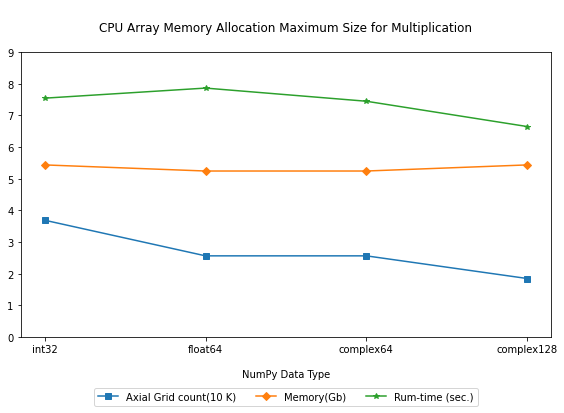

Done.


In [3]:
test_array_memory( use_gpu=0, operation="*", debug=1, verbose=0 )

use_gpu = 1, operation = 

cupy int32 (4 bytes)
Out of memory allocating 4,295,229,952 bytes (allocated so far: 4,294,967,296 bytes).
grid_count = 32_769, size = 4.3 Gb, run-time = 1.44 (sec.)

cupy float64 (8 bytes)
Out of memory allocating 2,147,746,304 bytes (allocated so far: 4,294,967,296 bytes).
grid_count = 16_385, size = 2.1 Gb, run-time = 0.00 (sec.)

cupy complex64 (8 bytes)
Out of memory allocating 2,147,746,304 bytes (allocated so far: 4,294,967,296 bytes).
grid_count = 16_385, size = 2.1 Gb, run-time = 0.00 (sec.)

cupy complex128 (16 bytes)
Out of memory allocating 2,416,312,832 bytes (allocated so far: 4,294,967,296 bytes).
grid_count = 12_289, size = 2.4 Gb, run-time = 0.00 (sec.)



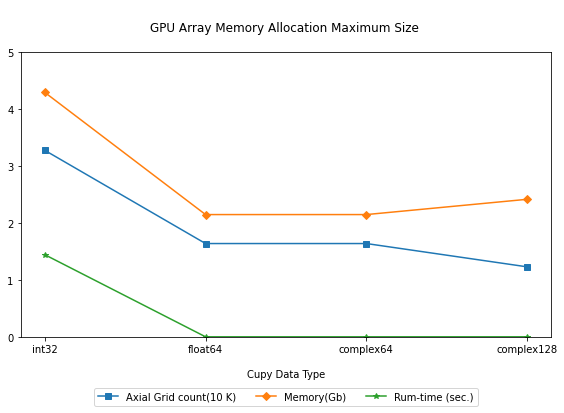

Done.


In [4]:
test_array_memory( use_gpu=1, operation="", debug=1, verbose=0 )

use_gpu = 1, operation = *

cupy int32 (4 bytes)
Out of memory allocating 1,073,741,824 bytes (allocated so far: 5,368,709,120 bytes).
grid_count = 16_383, size = 1.1 Gb, run-time = 0.00 (sec.)

cupy float64 (8 bytes)
Out of memory allocating 1,208,156,672 bytes (allocated so far: 5,502,926,848 bytes).
grid_count = 12_289, size = 1.2 Gb, run-time = 0.00 (sec.)

cupy complex64 (8 bytes)
Out of memory allocating 1,208,156,672 bytes (allocated so far: 5,502,926,848 bytes).
grid_count = 12_289, size = 1.2 Gb, run-time = 0.00 (sec.)

cupy complex128 (16 bytes)
Out of memory allocating 1,074,004,480 bytes (allocated so far: 5,653,921,792 bytes).
grid_count = 8_193, size = 1.4 Gb, run-time = 0.00 (sec.)



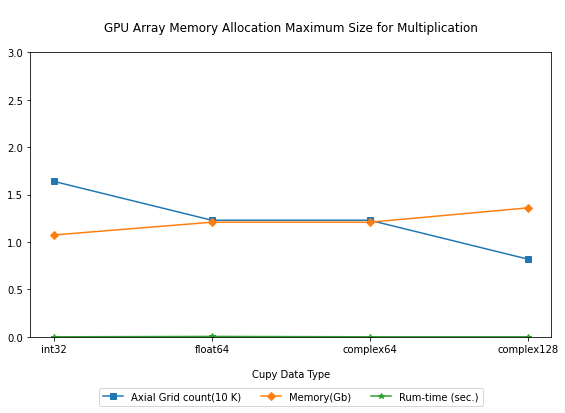

Done.


In [5]:
test_array_memory( use_gpu = 1, operation="*", debug=1, verbose=0 )